# Cyber Threat Hunting - Chapter 7

# Scenario

## Relying on standard deviation only

#### Listing 7.1 Jupyter notebook code — Searching for beaconing activities

In [56]:
import pandas as pd

df_original = pd.read_json("ch7_stream_events.json")
print(len(df_original))
df = df_original

320044


In [57]:
df.shape

(320044, 85)

In [58]:
df.shape

(320044, 85)

In [59]:
df.columns

Index(['bytes_in', '#type', 'dest_mac', '#repo', 'src_ip', '@sourcetype',
       'endtime', '@timezone', '@rawstring', '@id', '@timestamp',
       '@ingesttimestamp', 'timestamp', '@error', 'src_port', 'time_taken',
       'cribl_pipe', '@error_msg', 'dest_ip', 'transport', 'bytes',
       'transaction_id', '#error', 'dest_port', 'src_mac', 'protocol_stack',
       'bytes_out', 'flow_id', '@timestamp.nanos', 'packets_in', 'app',
       'packets_out', 'protocol', 'tos', 'fragment_count', 'version',
       'protoid', 'connection', 'refused', 'tcp_status', 'client_rtt_sum',
       'data_packets_in', 'server_rtt', 'server_rtt_packets',
       'duplicate_packets_in', 'data_packets_out', 'duplicate_packets_out',
       'ack_packets_out', 'ack_packets_in', 'missing_packets_in',
       'client_rtt_packets', 'missing_packets_out', 'client_rtt',
       'server_rtt_sum', 'initial_rtt', 'ssl_cert_self_signed',
       'ssl_cert_sha1', 'ssl_cert_md5', 'ssl_validity_start', 'ssl_issuer',
       'ssl_

In [60]:
df[(df['@sourcetype'] == 'stream:tcp') | (df['@sourcetype'] == 'stream:udp')]

,bytes_in,#type,dest_mac,#repo,src_ip,@sourcetype,endtime,@timezone,@rawstring,@id,...,http_content_length,server,uri_path,http_method,status,form_data,http_comment,http_content_type,uri_query,http_user_agent
4,175,stream:udp,FF:FF:FF:FF:FF:FF,Threat_Hunting,10.0.0.18,stream:udp,2022-09-19T20:59:58.337959Z,Z,"{""endtime"":""2022-09-19T20:59:58.337959Z"",""time...",02WG5MlfN9D7lTOJdOA4zjpz_54_361_1663621198,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,175,stream:udp,FF:FF:FF:FF:FF:FF,Threat_Hunting,10.0.0.18,stream:udp,2022-09-19T20:59:58.338787Z,Z,"{""endtime"":""2022-09-19T20:59:58.338787Z"",""time...",02WG5MlfN9D7lTOJdOA4zjpz_54_360_1663621198,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,172,stream:udp,12:34:56:78:9A:BC,Threat_Hunting,10.0.0.18,stream:udp,2022-09-19T20:59:44.983553Z,Z,"{""endtime"":""2022-09-19T20:59:44.983553Z"",""time...",02WG5MlfN9D7lTOJdOA4zjpz_54_359_1663621184,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,88,stream:udp,12:34:56:78:9A:BC,Threat_Hunting,10.0.0.16,stream:udp,2022-09-19T20:59:36.763847Z,Z,"{""endtime"":""2022-09-19T20:59:36.763847Z"",""time...",02WG5MlfN9D7lTOJdOA4zjpz_54_358_1663621176,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,97,stream:udp,12:34:56:78:9A:BC,Threat_Hunting,10.0.0.13,stream:udp,2022-09-19T20:59:29.720741Z,Z,"{""endtime"":""2022-09-19T20:59:29.720741Z"",""time...",02WG5MlfN9D7lTOJdOA4zjpz_54_357_1663621169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320039,66,stream:tcp,00:22:48:2D:87:35,Threat_Hunting,168.63.129.16,stream:tcp,2022-09-19T20:33:23.588722Z,Z,"{""endtime"":""2022-09-19T20:33:23.588722Z"",""time...",nBCqAyE99Cb5cutkm4tiN8QR_1107_4_1663619603,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320040,228,stream:tcp,12:34:56:78:9A:BC,Threat_Hunting,10.0.0.15,stream:tcp,2022-09-19T20:33:23.439133Z,Z,"{""endtime"":""2022-09-19T20:33:23.439133Z"",""time...",nBCqAyE99Cb5cutkm4tiN8QR_1107_3_1663619603,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320041,438,stream:tcp,12:34:56:78:9A:BC,Threat_Hunting,10.0.0.13,stream:tcp,2022-09-19T20:33:22.803383Z,Z,"{""endtime"":""2022-09-19T20:33:22.803383Z"",""time...",nBCqAyE99Cb5cutkm4tiN8QR_1107_2_1663619602,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320042,228,stream:tcp,12:34:56:78:9A:BC,Threat_Hunting,10.0.0.8,stream:tcp,2022-09-19T20:33:22.386591Z,Z,"{""endtime"":""2022-09-19T20:33:22.386591Z"",""time...",nBCqAyE99Cb5cutkm4tiN8QR_1107_1_1663619602,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
count_threshold = 100
df = df.groupby(['src_ip', 'dest_ip', 'dest_port']).filter \
    (lambda x : len(x)>count_threshold)
df = df.reset_index()
print(len(df.index), "records with count >", count_threshold)

268465 records with count > 100


In [62]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='mixed')
df['endtime'] = pd.to_datetime(df['endtime'], format='mixed')
df['epoch_timestamp'] = df['timestamp'].astype('int64') // 10**9
df['epoch_endtime'] = df['endtime'].astype('int64') // 10**9

In [63]:
df[['timestamp', 'epoch_timestamp', 'endtime', 'epoch_endtime']]

,timestamp,epoch_timestamp,endtime,epoch_endtime
0,2022-09-19 14:15:22.282843+00:00,1663596922,2022-09-19 14:15:22.282843+00:00,1663596922
1,2022-09-19 13:35:52.852283+00:00,1663594552,2022-09-19 13:35:52.852283+00:00,1663594552
2,2022-09-19 20:59:58.337959+00:00,1663621198,2022-09-19 20:59:58.337959+00:00,1663621198
3,2022-09-19 20:59:58.338787+00:00,1663621198,2022-09-19 20:59:58.338787+00:00,1663621198
4,2022-09-19 20:59:44.867050+00:00,1663621184,2022-09-19 20:59:44.983553+00:00,1663621184
...,...,...,...,...
268460,2022-09-19 20:33:23.588685+00:00,1663619603,2022-09-19 20:33:23.588722+00:00,1663619603
268461,2022-09-19 20:33:23.275126+00:00,1663619603,2022-09-19 20:33:23.439133+00:00,1663619603
268462,2022-09-19 20:33:22.799918+00:00,1663619602,2022-09-19 20:33:22.803383+00:00,1663619602
268463,2022-09-19 20:33:22.228476+00:00,1663619602,2022-09-19 20:33:22.386591+00:00,1663619602


In [64]:
df = df.sort_values(by=['epoch_timestamp'], ascending=True)
df['epoch_timestamp'] = df['epoch_timestamp'].astype(int)
df['epoch_endtime'] = df['epoch_endtime'].astype(int)
df['bytes'] = df['bytes'].astype(int)
df['bytes_in'] = df['bytes_in'].astype(int)
df.dtypes

index                 int64
bytes_in              int64
#type                object
dest_mac             object
#repo                object
                      ...  
http_content_type    object
uri_query            object
http_user_agent      object
epoch_timestamp       int64
epoch_endtime         int64
Length: 88, dtype: object

In [65]:
df['time_diff_sec'] = df.groupby(['src_ip', 'dest_ip', 'dest_port'])\
    ['epoch_timestamp'].transform(lambda x: x - x.shift(1))

In [66]:
df['std1'] = df.groupby(['src_ip', 'dest_ip', 'dest_port'])\
    ['time_diff_sec'].transform('std')
df['var1'] = df.groupby(['src_ip', 'dest_ip', 'dest_port'])\
    ['time_diff_sec'].transform('var')
df['count1'] = df.groupby(['src_ip', 'dest_ip', 'dest_port'])\
    ['time_diff_sec'].transform('count')
df[['var1','std1']].sort_values(by=['std1'], ascending=True)

,var1,std1
212167,5.847953e-03,0.076472
192002,5.847953e-03,0.076472
25321,5.847953e-03,0.076472
174854,5.847953e-03,0.076472
260500,5.847953e-03,0.076472
...,...,...
71516,1.160147e+06,1077.101422
71519,1.160147e+06,1077.101422
71512,1.160147e+06,1077.101422
71510,1.160147e+06,1077.101422


In [67]:
unique_df = df.drop_duplicates(['src_ip', 'dest_ip', 'dest_port'])
unique_df[['src_ip', 'dest_ip', 'dest_port', 'std1', 'var1',\
    'count1', 'app']].sort_values(by=['std1'], ascending=True)

,src_ip,dest_ip,dest_port,std1,var1,count1,app
10005,10.0.0.16,20.7.2.167,443.0,0.076472,5.847953e-03,171,unknown
10386,10.0.0.13,20.10.31.115,443.0,0.079809,6.369427e-03,157,unknown
10707,10.0.0.4,20.7.2.167,443.0,0.138973,1.931348e-02,156,ssl
10711,10.0.0.8,20.7.1.246,443.0,0.152499,2.325581e-02,172,ssl
8646,10.0.0.18,10.0.15.255,17500.0,0.324636,1.053885e-01,1371,dropbox
...,...,...,...,...,...,...,...
9196,10.0.0.4,162.125.2.14,443.0,318.094573,1.011842e+05,188,dropbox
10754,10.0.0.4,40.87.160.0,23456.0,319.823560,1.022871e+05,147,unknown
51892,10.0.0.4,13.107.4.50,80.0,343.434325,1.179471e+05,827,NaN
73010,10.0.0.9,13.107.4.50,80.0,976.185376,9.529379e+05,147,NaN


In [74]:
std_threshold = 100
unique_df = unique_df.loc[unique_df['std1'] <  \
    std_threshold].sort_values(by=['dest_ip'], ascending=True)
unique_df[['src_ip', 'dest_ip', 'dest_port', \
    'std1', 'var1', 'count1',  'app']].sort_values(by=['std1'], ascending=True)

,src_ip,dest_ip,dest_port,std1,var1,count1,app
10386,10.0.0.13,20.10.31.115,443.0,0.079809,0.006369,157,unknown
10707,10.0.0.4,20.7.2.167,443.0,0.138973,0.019313,156,ssl
10711,10.0.0.8,20.7.1.246,443.0,0.152499,0.023256,172,ssl
8646,10.0.0.18,10.0.15.255,17500.0,0.324636,0.105388,1371,dropbox
8645,10.0.0.18,255.255.255.255,17500.0,0.324636,0.105388,1371,dropbox
211097,52.151.54.66,10.0.0.12,3389.0,1.855641,3.443402,299,unknown
10826,10.0.0.9,44.238.73.15,9997.0,4.323116,18.689332,1412,splunk
10812,168.63.129.16,10.0.0.18,80.0,5.012022,25.120366,13759,unknown
10796,168.63.129.16,10.0.0.16,80.0,5.012544,25.125599,13759,unknown
10800,168.63.129.16,10.0.0.9,80.0,5.012892,25.129088,13759,unknown


In [75]:
unique_df = unique_df.loc[unique_df['std1'] < \
    std_threshold].drop_duplicates(['dest_ip'])
unique_df[['dest_ip']].sort_values(by=['dest_ip'], \
    ascending=True)

,dest_ip
211097,10.0.0.12
189515,10.0.0.13
167652,10.0.0.15
10796,10.0.0.16
10812,10.0.0.18
162085,10.0.0.4
10809,10.0.0.8
10800,10.0.0.9
8646,10.0.15.255
8617,168.63.129.16


#### Listing 7.2 Jupyter notebook code — Exclude benign traffic by destination IP address 

In [76]:
unique_df.loc[
   (unique_df['src_ip'].str.startswith('10.')) \
    & (unique_df['dest_port'] != 9997) \
    & (~unique_df['dest_ip'].str.endswith(".255")) \
    & (~unique_df['dest_ip'].str.contains("20.7.1")) \
    & (~unique_df['dest_ip'].str.contains("20.7.2")) \
    & (~unique_df['dest_ip'].str.contains("20.10.31.115")) \
    & (~unique_df['dest_ip'].str.contains("168.63.129.16")) \
    & (~unique_df['dest_ip'].str.contains("169.254.169.254")) \
    & (~unique_df['dest_ip'].str.contains("239.255.255.250")) \
    & (~unique_df['dest_ip'].str.contains("13.107.4.50")) \
    , ['src_ip', 'dest_ip', 'dest_port', 'std1', 'var1', 'count1']
    ].sort_values(by=['std1'], ascending=True)

,src_ip,dest_ip,dest_port,std1,var1,count1


## Enhancing the analytic techniques with interquartile range

#### Listing 7.3 Jupyter Notebook code — Calculate the lower and upper quartiles

In [103]:
import pandas as pd

df_original = pd.read_json("ch7_stream_events.json")
print(len(df_original))
df = df_original

count_threshold = 100
df = df.groupby(['src_ip', 'dest_ip', 'dest_port']).filter \
    (lambda x : len(x)>count_threshold)
df = df.reset_index()
print(len(df.index), "records with count >", count_threshold)
df['timestamp'] = pd.to_datetime(df['timestamp'], format='mixed')
df['endtime'] = pd.to_datetime(df['endtime'], format='mixed')
df['epoch_timestamp'] = df['timestamp'].astype('int64') // 10**9
df['epoch_endtime'] = df['endtime'].astype('int64') // 10**9

df = df.sort_values(by=['epoch_timestamp'], ascending=True)
df['epoch_timestamp'] = df['epoch_timestamp'].astype(int)
df['epoch_endtime'] = df['epoch_endtime'].astype(int)
df['bytes'] = df['bytes'].astype(int)
df['bytes_in'] = df['bytes_in'].astype(int)
df.dtypes

df['time_diff_sec'] = df.groupby(['src_ip', 'dest_ip', 'dest_port'])\
    ['epoch_timestamp'].transform(lambda x: x - x.shift(1))

320044
268465 records with count > 100


In [104]:
df['lower_quartile'] = df.groupby(['src_ip', 'dest_ip', 'dest_port'])\
    ['time_diff_sec'].transform(lambda x: x.quantile(q=0.25))
df['upper_quartile'] = df.groupby(['src_ip', 'dest_ip', 'dest_port'])\
    ['time_diff_sec'].transform(lambda x: x.quantile(q=0.75))

#### Listing 7.4 Jupyter notebook code — Drop rows with values of time_diff_sec outside the IQR

In [105]:
df = df.drop(df[(df['time_diff_sec'] < df['lower_quartile'])].index)
df = df.drop(df[(df['time_diff_sec'] > df['upper_quartile'])].index)

#### Listing 7.5 Jupyter notebook code — Calculate standard deviation, variance, and number of connections per src_ip, dest_ip and dest_port

In [107]:
df['std1'] = df.groupby(['src_ip', 'dest_ip', 'dest_port'])\
    ['time_diff_sec'].transform('std')
df['var1'] = df.groupby(['src_ip', 'dest_ip', 'dest_port'])\
    ['time_diff_sec'].transform('var')
df['count1'] = df.groupby(['src_ip', 'dest_ip', 'dest_port'])\
    ['time_diff_sec'].transform('count')

#### Listing 7.6 Jupyter notebook code — Drop duplicate rows based on src_ip,dest_ip, and dest_port

In [108]:
unique_df = df.drop_duplicates(['src_ip', 'dest_ip', 'dest_port'])

#### Listing 7.7 Jupyter notebook code — Keep rows with low standard deviation values

In [109]:
std_threshold = 100
unique_df = unique_df.loc[unique_df['std1'] < std_threshold].sort_values(by=['dest_ip'], ascending=True)
unique_df[['src_ip', 'dest_ip', 'dest_port', 'std1', 'var1', 'count1', 'app']].sort_values(by=['std1'], ascending=True)

,src_ip,dest_ip,dest_port,std1,var1,count1,app
10765,10.0.0.18,44.238.73.15,9997.0,0.000000,0.000000,1235,splunk
10711,10.0.0.8,20.7.1.246,443.0,0.000000,0.000000,171,ssl
10707,10.0.0.4,20.7.2.167,443.0,0.000000,0.000000,153,ssl
10287,10.0.0.9,20.7.2.167,443.0,0.000000,0.000000,171,ssl
51892,10.0.0.4,13.107.4.50,80.0,0.000000,0.000000,696,NaN
...,...,...,...,...,...,...,...
72905,10.0.0.12,169.254.169.254,80.0,90.082003,8114.767184,451,NaN
10215,10.0.0.16,169.254.169.254,80.0,90.082288,8114.818645,449,windows_azure
72853,10.0.0.18,169.254.169.254,80.0,90.083446,8115.027231,452,NaN
72647,10.0.0.9,169.254.169.254,80.0,90.083755,8115.082846,450,NaN


#### Listing 7.8 Jupyter notebook code — Exclude benign traffic by destination IP address

In [110]:
unique_df.loc[
   (unique_df['src_ip'].str.startswith('10.')) \
    & (unique_df['dest_port'] != 9997) \
    & (~unique_df['dest_ip'].str.endswith(".255")) \
    & (~unique_df['dest_ip'].str.contains("20.7.1")) \
    & (~unique_df['dest_ip'].str.contains("20.7.2")) \
    & (~unique_df['dest_ip'].str.contains("20.10.31.115")) \
    & (~unique_df['dest_ip'].str.contains("168.63.129.16")) \
    & (~unique_df['dest_ip'].str.contains("169.254.169.254")) \
    & (~unique_df['dest_ip'].str.contains("239.255.255.250")) \
    & (~unique_df['dest_ip'].str.contains("13.107.4.50")) \
    , ['src_ip', 'dest_ip', 'dest_port', 'std1', 'var1', 'count1']
    ].sort_values(by=['std1'], ascending=True)

,src_ip,dest_ip,dest_port,std1,var1,count1
9776,10.0.0.18,162.125.2.14,443.0,28.005122,784.286854,119
9196,10.0.0.4,162.125.2.14,443.0,56.820850,3228.609014,94
10464,10.0.0.15,40.87.160.0,23456.0,60.947747,3714.627879,100
10004,10.0.0.18,40.87.160.0,23456.0,65.965584,4351.458242,105
10306,10.0.0.9,40.87.160.0,23456.0,72.778727,5296.743137,85
10515,10.0.0.12,40.87.160.0,23456.0,77.754161,6045.709502,108
10753,10.0.0.8,40.87.160.0,23456.0,78.296745,6130.380235,84
9660,10.0.0.16,40.87.160.0,23456.0,87.424252,7642.999849,82
10634,10.0.0.13,40.87.160.0,23456.0,88.084637,7758.903297,91
10754,10.0.0.4,40.87.160.0,23456.0,97.601937,9526.138070,76


## Interrogating the first suspect, 162.125.2.14

#### Listing 7.10 Jupyter notebook code — Retrieve details about connections between 10.0.0.18 and 162.125.2.14

In [119]:
unique_df.loc[(unique_df['src_ip'] == '10.0.0.18') & \
    (unique_df['dest_ip'] == '162.125.2.14') & \
        (unique_df['dest_port'] == 443), ['src_ip', \
            'dest_ip', 'dest_port', 'app', 'std1', 'lower_quartile',
                'upper_quartile','var1', 'count1']]

,src_ip,dest_ip,dest_port,app,std1,lower_quartile,upper_quartile,var1,count1
9776,10.0.0.18,162.125.2.14,443.0,dropbox,28.005122,50.0,156.0,784.286854,119


#### Listing 7.12 Jupyter notebook code — Retrieve details about connections between 10.0.0.4 and 162.125.2.14

In [120]:
unique_df.loc[(unique_df['src_ip'] == '10.0.0.4') & \
    (unique_df['dest_ip'] == '162.125.2.14') & \
        (unique_df['dest_port'] == 443), ['src_ip', \
            'dest_ip', 'dest_port', 'app', 'std1', 'lower_quartile',
                'upper_quartile','var1', 'count1']]

,src_ip,dest_ip,dest_port,app,std1,lower_quartile,upper_quartile,var1,count1
9196,10.0.0.4,162.125.2.14,443.0,dropbox,56.82085,46.75,266.25,3228.609014,94


## Analyzing the data further

#### Listing 7.24 Jupyter notebook code — Retrieve and process the data

In [121]:
import pandas as pd

df_original = pd.read_json("ch7_stream_events.json")
print(len(df_original))
df = df_original

count_threshold = 100
df = df.groupby(['src_ip', 'dest_ip', 'dest_port']).filter \
    (lambda x : len(x)>count_threshold)
df = df.reset_index()
print(len(df.index), "records with count >", count_threshold)
df['timestamp'] = pd.to_datetime(df['timestamp'], format='mixed')
df['endtime'] = pd.to_datetime(df['endtime'], format='mixed')
df['epoch_timestamp'] = df['timestamp'].astype('int64') // 10**9
df['epoch_endtime'] = df['endtime'].astype('int64') // 10**9

df = df.sort_values(by=['epoch_timestamp'], ascending=True)
df['epoch_timestamp'] = df['epoch_timestamp'].astype(int)
df['epoch_endtime'] = df['epoch_endtime'].astype(int)
df['bytes'] = df['bytes'].astype(int)
df['bytes_in'] = df['bytes_in'].astype(int)
df.dtypes

df['time_diff_sec'] = df.groupby(['src_ip', 'dest_ip', 'dest_port'])\
    ['epoch_timestamp'].transform(lambda x: x - x.shift(1))

df['lower_quartile'] = df.groupby(['src_ip', 'dest_ip', 'dest_port'])\
    ['time_diff_sec'].transform(lambda x: x.quantile(q=0.25))
df['upper_quartile'] = df.groupby(['src_ip', 'dest_ip', 'dest_port'])\
    ['time_diff_sec'].transform(lambda x: x.quantile(q=0.75))

df['std1'] = df.groupby(['src_ip', 'dest_ip', 'dest_port'])\
    ['time_diff_sec'].transform('std')
df['var1'] = df.groupby(['src_ip', 'dest_ip', 'dest_port'])\
    ['time_diff_sec'].transform('var')
df['count1'] = df.groupby(['src_ip', 'dest_ip', 'dest_port'])\
    ['time_diff_sec'].transform('count')

320044
268465 records with count > 100


###

#### Listing 7.25 Jupyter notebook code — Plot the value of time_diff_sec for connections between 10.0.0.4 and 162.125.2.14 over port 443

<Axes: xlabel='epoch_timestamp'>

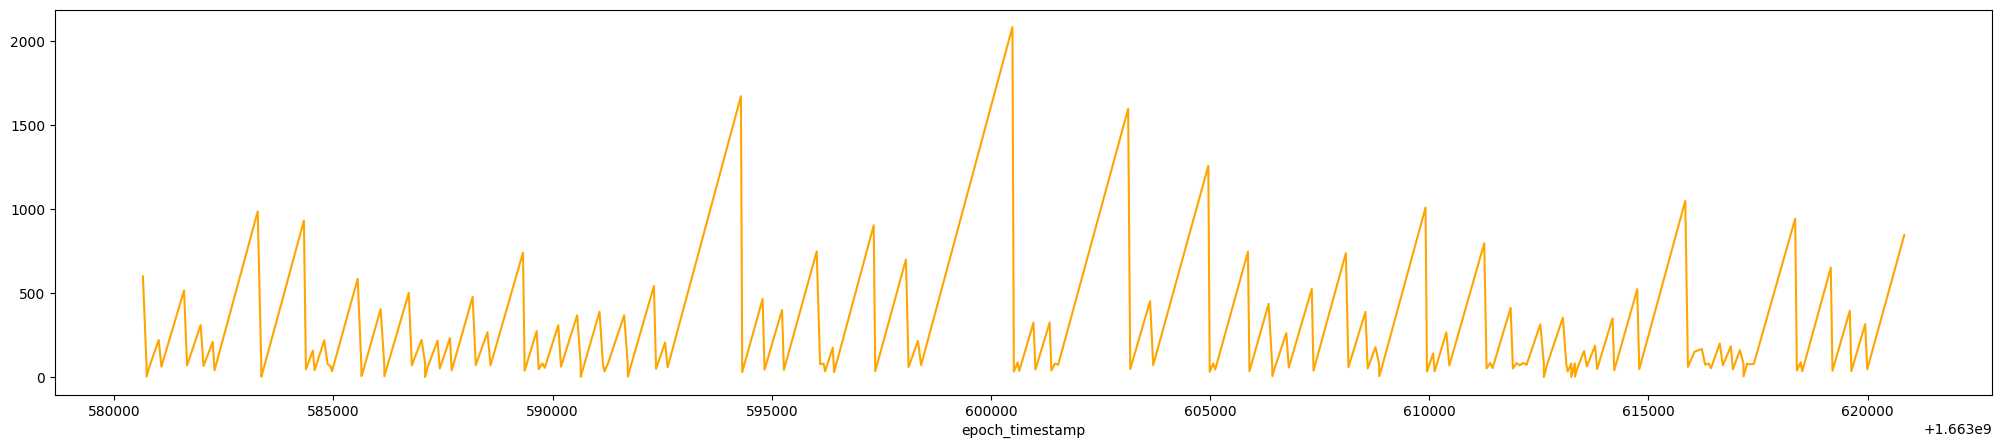

In [135]:
df.loc[(df['src_ip'] == '10.0.0.4') &(df['dest_ip'] == '162.125.2.14') & \
       (df['dest_port'] == 443)].sort_values(by=['epoch_timestamp'], \
              ascending = True).set_index('epoch_timestamp')\
                     ['time_diff_sec'].plot(figsize=[25,5], \
                            kind = 'line', color = 'orange')

#### Listing 7.26 Jupyter notebook code — Plot the value of time_diff_sec for connections between 10.0.0.18 and 162.125.2.14 over port 443

<Axes: xlabel='epoch_timestamp'>

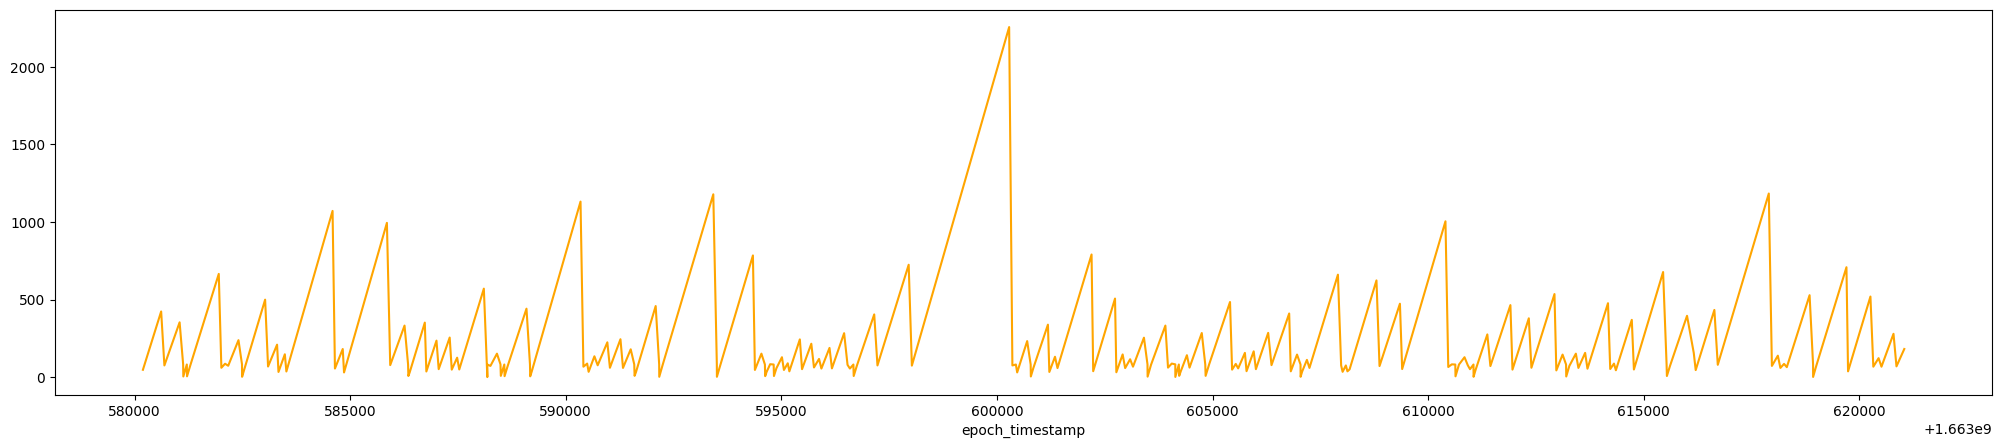

In [136]:
df.loc[(df['src_ip'] == '10.0.0.18') &(df['dest_ip'] == '162.125.2.14') & \
       (df['dest_port'] == 443)].sort_values(by=['epoch_timestamp'], \
              ascending = True).set_index('epoch_timestamp')\
                     ['time_diff_sec'].plot(figsize=[25,5], \
                            kind = 'line', color = 'orange')

#### Listing 7.27 Jupyter notebook code — Plot the values of time_diff_sec for connections between 10.0.0.4 and 162.125.2.14 over port 443

<Axes: >

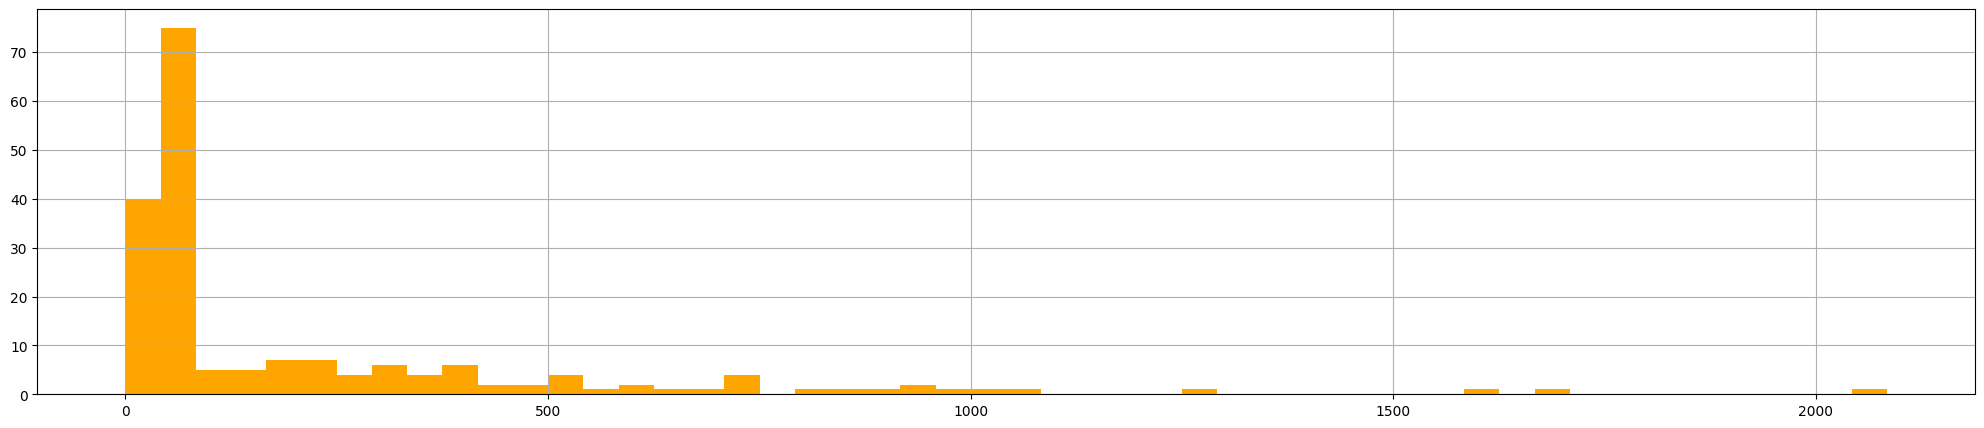

In [140]:
df.loc[(df['src_ip'] == '10.0.0.4') &(df['dest_ip'] == '162.125.2.14') & \
    (df['dest_port'] == 443)].sort_values(by=['epoch_timestamp'], \
        ascending = True).set_index('epoch_timestamp')\
            ['time_diff_sec'].hist(figsize = [25,5], bins = 50, \
                color = 'orange')

#### Listing 7.28 Jupyter notebook code — Plot the values of time_diff_sec for connections between 10.0.0.18 and 162.125.2.14 over port 443

<Axes: >

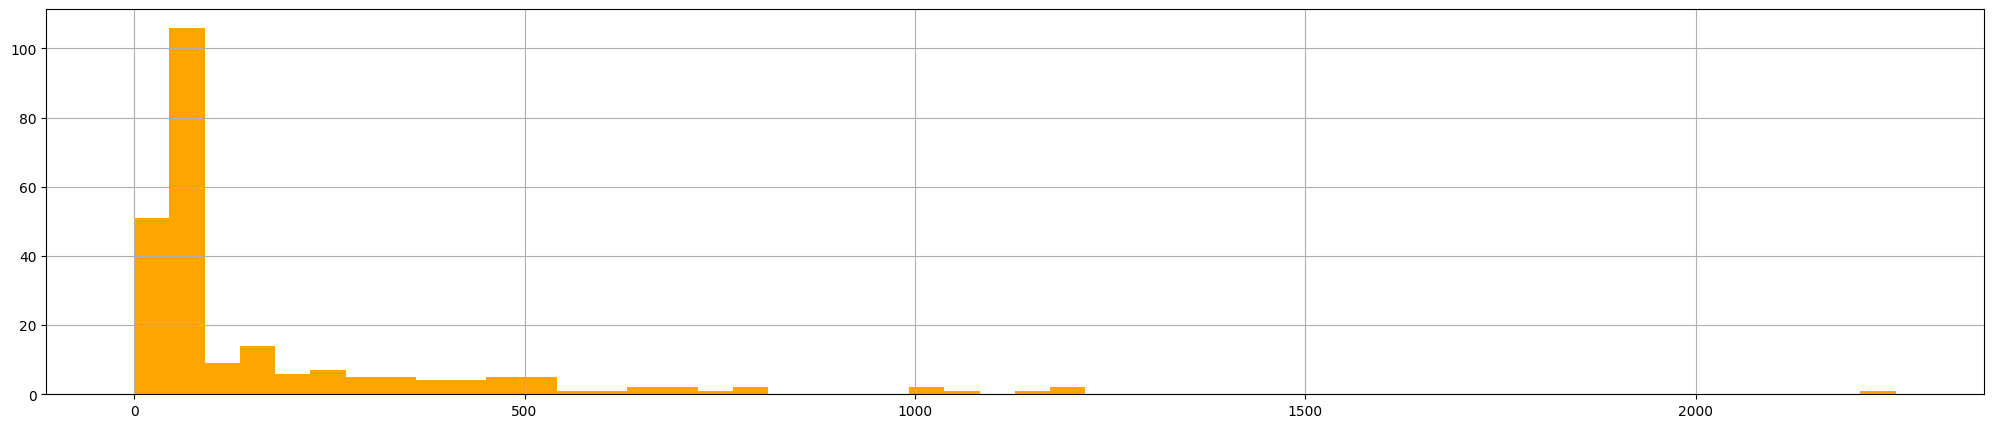

In [141]:
df.loc[(df['src_ip'] == '10.0.0.18') &(df['dest_ip'] == '162.125.2.14') & \
    (df['dest_port'] == 443)].sort_values(by=['epoch_timestamp'], \
        ascending = True).set_index('epoch_timestamp')\
            ['time_diff_sec'].hist(figsize = [25,5], bins = 50, \
                color = 'orange')

## Analyzing fields of interest

#### Listing 7.30 Jupyter notebook code – Show the distribution field bytes for connections between 10.0.0.4 and IP addresses that contain 162.125

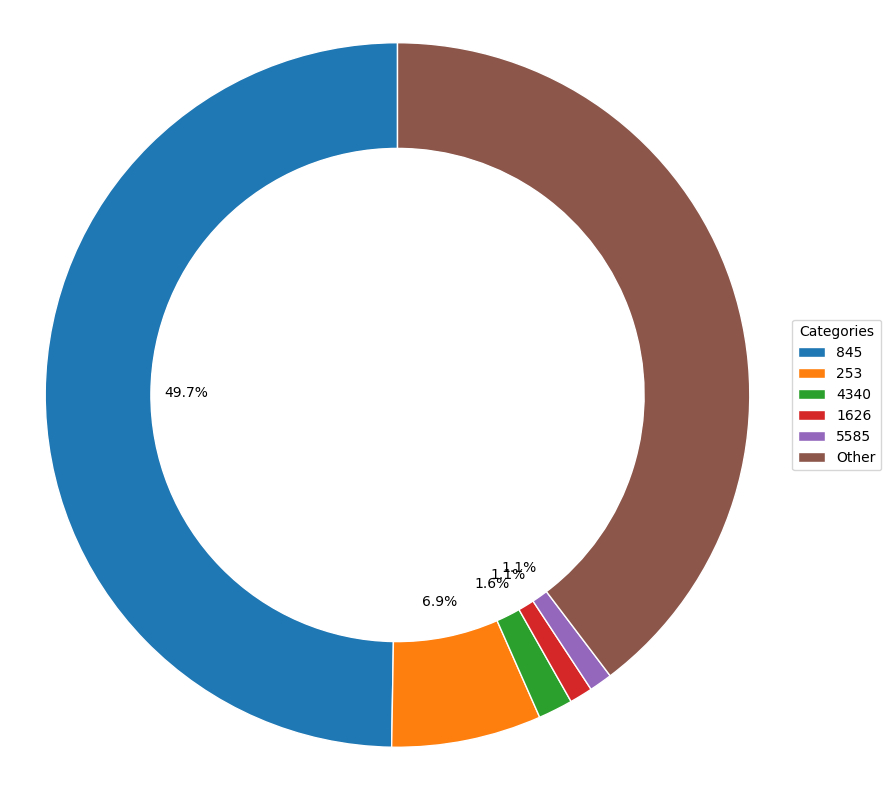

In [155]:
import matplotlib.pyplot as plt

grouped_data = df[
    (df['src_ip'] == '10.0.0.4') & 
    (df['dest_ip'].str.contains('162.125')) & 
    (df['@sourcetype'] == 'stream:tcp')
    ].groupby('bytes').size()

grouped_data = grouped_data.sort_values(ascending=False)
top_5 = grouped_data[:5]
others = pd.Series(grouped_data[5:].sum(), index=['Other'])
plot_data = pd.concat([top_5, others])

plt.figure(figsize=[10, 10])
wedges, texts, autotexts = plt.pie(plot_data, \
    autopct='%1.1f%%', startangle=90, \
        wedgeprops=dict(width=0.3, edgecolor='w'))
plt.setp(autotexts, color='white')
plt.setp(autotexts[:5], color='black')
plt.axis('equal')

center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.legend(wedges, plot_data.index, title='Categories', \
    loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

#### Listing 7.31 Jupyter notebook code – Show the distribution field bytes for connections between 10.0.0.18 and IP addresses that contain 162.125

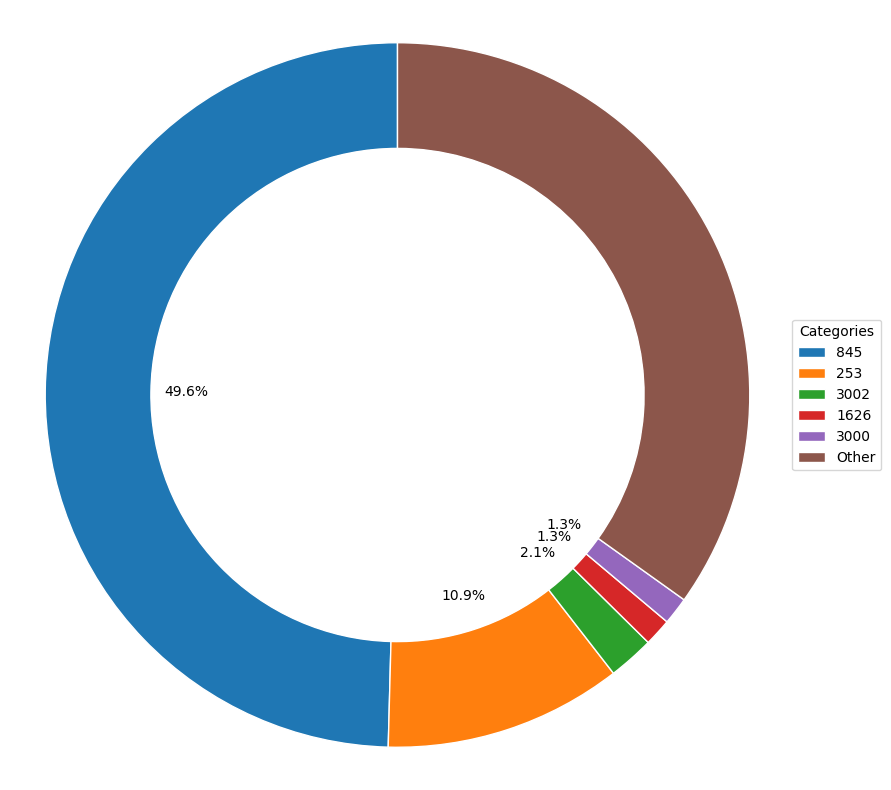

In [157]:
grouped_data = df[
    (df['src_ip'] == '10.0.0.18') & 
    (df['dest_ip'].str.contains('162.125')) & 
    (df['@sourcetype'] == 'stream:tcp')
    ].groupby('bytes').size()

grouped_data = grouped_data.sort_values(ascending=False)
top_5 = grouped_data[:5]
others = pd.Series(grouped_data[5:].sum(), index=['Other'])
plot_data = pd.concat([top_5, others])

plt.figure(figsize=[10, 10])
wedges, texts, autotexts = plt.pie(plot_data, \
    autopct='%1.1f%%', startangle=90, \
        wedgeprops=dict(width=0.3, edgecolor='w'))
plt.setp(autotexts, color='white')
plt.setp(autotexts[:5], color='black')
plt.axis('equal')

center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.legend(wedges, plot_data.index, title='Categories', \
    loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

#### Correspond to  Listing 7.32 Humio search code – List the values of fields bytes and ssl_client_cipher_list for connections between 10.0.0.4 and IP addresses that contain 162.125

In [206]:
df_original = pd.read_json("ch7_stream_events.json")
print(len(df_original))
df = df_original


320044


In [207]:
df.columns

Index(['bytes_in', '#type', 'dest_mac', '#repo', 'src_ip', '@sourcetype',
       'endtime', '@timezone', '@rawstring', '@id', '@timestamp',
       '@ingesttimestamp', 'timestamp', '@error', 'src_port', 'time_taken',
       'cribl_pipe', '@error_msg', 'dest_ip', 'transport', 'bytes',
       'transaction_id', '#error', 'dest_port', 'src_mac', 'protocol_stack',
       'bytes_out', 'flow_id', '@timestamp.nanos', 'packets_in', 'app',
       'packets_out', 'protocol', 'tos', 'fragment_count', 'version',
       'protoid', 'connection', 'refused', 'tcp_status', 'client_rtt_sum',
       'data_packets_in', 'server_rtt', 'server_rtt_packets',
       'duplicate_packets_in', 'data_packets_out', 'duplicate_packets_out',
       'ack_packets_out', 'ack_packets_in', 'missing_packets_in',
       'client_rtt_packets', 'missing_packets_out', 'client_rtt',
       'server_rtt_sum', 'initial_rtt', 'ssl_cert_self_signed',
       'ssl_cert_sha1', 'ssl_cert_md5', 'ssl_validity_start', 'ssl_issuer',
       'ssl_

In [208]:
# Regex pattern to find the ssl_client_cipher_list array
pattern = r'"ssl_client_cipher_list":\[(.*?)\]'

# Function to extract cipher list using regex
def extract_cipher_list_regex(json_string):
    match = re.search(pattern, json_string)
    if match:
        return match.group(1)  # Return the capturing group that contains the cipher list numbers
    else:
        return ""  # Return an empty string or some default value if no match is found

# Apply the regex extraction method to each row in the @rawstring column
df['cipher_list'] = df['@rawstring'].apply(extract_cipher_list_regex)

# Display the updated DataFrame
non_empty_rows = df[df['cipher_list'].str.len() > 0]
print(non_empty_rows['cipher_list'])

53132     49196,49195,49200,49199,159,158,49188,49187,49...
53157     49196,49195,49200,49199,49188,49187,49192,4919...
53170     49196,49195,49200,49199,159,158,49188,49187,49...
53175     4866,4867,4865,49196,49200,159,52393,52392,523...
53218     49196,49195,49200,49199,49188,49187,49192,4919...
                                ...                        
319760    49196,49195,49200,49199,159,158,49188,49187,49...
319807    49196,49195,49200,49199,159,158,49188,49187,49...
319814    49196,49195,49200,49199,159,158,49188,49187,49...
319870    64250,4865,4866,4866,4867,49195,49199,49196,49...
320028    49196,49195,49200,49199,159,158,49188,49187,49...
Name: cipher_list, Length: 5055, dtype: object


In [231]:
df.loc[(df['src_ip'] == '10.0.0.4') & \
    (df['dest_ip'].str.contains('162.125')), \
        ['src_ip', 'dest_ip', 'dest_port', 'app', \
            'cipher_list', 'bytes']].groupby(['cipher_list',\
                'bytes']).size().reset_index(name='count').\
                    sort_values(by='count', ascending=False)

,cipher_list,bytes,count
2,,396.0,150
201,"49196,49195,49200,49199,159,158,49188,49187,49...",845.0,149
0,,51.0,23
1,,253.0,23
8,,1242.0,5
...,...,...,...
90,,4675.0,1
91,,4786.0,1
92,,4820.0,1
93,,4823.0,1


#### Correspond to Listing 7.34 Humio search output – List the values of fields bytes and ssl_client_cipher_list for connections between 10.0.0.18 and IP addresses that contain 162.125 

In [241]:
df.loc[(df['src_ip'] == '10.0.0.18') & \
    (df['dest_ip'].str.contains('162.125')), \
        ['src_ip', 'dest_ip', 'dest_port', 'app', \
            'cipher_list', 'bytes']].groupby(['cipher_list',\
                'bytes']).size().reset_index(name='count').\
                    sort_values(by='count', ascending=False)

,cipher_list,bytes,count
9,,396.0,236
430,"49196,49195,49200,49199,159,158,49188,49187,49...",845.0,168
2,,234.0,114
4,,354.0,82
408,"49196,49195,49200,49199,159,158,49188,49187,49...",854.0,65
...,...,...,...
193,,9610.0,1
192,,9598.0,1
191,,9591.0,1
190,,9590.0,1


#### Correspond to Listing 7.37 Humio search code – Find source IP addresses and destination ports for connections to 40.87.160.0

In [240]:
df.loc[(df['dest_ip'].str.contains('40.87.160.0')), \
        ['src_ip', 'dest_ip', 'dest_port', 'bytes', \
            'data_packets_out']].groupby(['src_ip', \
                'dest_ip', 'dest_port', 'bytes', \
            'data_packets_out']).size().reset_index(name='count')

,src_ip,dest_ip,dest_port,bytes,data_packets_out,count
0,10.0.0.12,40.87.160.0,23456.0,114.0,0.0,6
1,10.0.0.12,40.87.160.0,23456.0,140.0,0.0,196
2,10.0.0.13,40.87.160.0,23456.0,114.0,0.0,2
3,10.0.0.13,40.87.160.0,23456.0,140.0,0.0,167
4,10.0.0.15,40.87.160.0,23456.0,114.0,0.0,1
5,10.0.0.15,40.87.160.0,23456.0,140.0,0.0,194
6,10.0.0.16,40.87.160.0,23456.0,114.0,0.0,2
7,10.0.0.16,40.87.160.0,23456.0,140.0,0.0,156
8,10.0.0.18,40.87.160.0,23456.0,114.0,0.0,7
9,10.0.0.18,40.87.160.0,23456.0,140.0,0.0,191


# Answers to Exercise

#### Correspond to Listing 7.40 Humio search code – Top 10 destination IP addresses starting with 162.125 communicating with 10.0.0.18

In [63]:
df_original = pd.read_json("ch7_stream_events.json")
df = df_original

In [64]:
df_original.loc[(df_original['src_ip'] == '10.0.0.18') & \
    (df_original['dest_ip'].str.contains('162.125')), \
        ['dest_ip']].groupby(['dest_ip']).size().reset_index(name='count').\
                    sort_values(by='count', ascending=False).head(10)

,dest_ip,count
7,162.125.2.14,476
3,162.125.19.131,174
18,162.125.4.14,162
6,162.125.2.13,102
34,162.125.7.20,90
5,162.125.19.9,88
2,162.125.19.130,86
43,162.125.8.20,86
10,162.125.2.19,64
17,162.125.4.13,60


#### Correspond to Listing 7.41 Humio search output – Top 10 destination IP addresses starting with 162.125 communicating with 10.0.0.18

In [65]:
import re

# Regex pattern to find the ssl_client_cipher_list array
pattern = r'"ssl_client_cipher_list":\[(.*?)\]'

# Function to extract cipher list using regex
def extract_cipher_list_regex(json_string):
    match = re.search(pattern, json_string)
    if match:
        return match.group(1)  # Return the capturing group that contains the cipher list numbers
    else:
        return ""  # Return an empty string or some default value if no match is found

# Apply the regex extraction method to each row in the @rawstring column
df['cipher_list'] = df['@rawstring'].apply(extract_cipher_list_regex)

# Display the updated DataFrame
non_empty_rows = df[df['cipher_list'].str.len() > 0]
print(non_empty_rows['cipher_list'])

53132     49196,49195,49200,49199,159,158,49188,49187,49...
53157     49196,49195,49200,49199,49188,49187,49192,4919...
53170     49196,49195,49200,49199,159,158,49188,49187,49...
53175     4866,4867,4865,49196,49200,159,52393,52392,523...
53218     49196,49195,49200,49199,49188,49187,49192,4919...
                                ...                        
319760    49196,49195,49200,49199,159,158,49188,49187,49...
319807    49196,49195,49200,49199,159,158,49188,49187,49...
319814    49196,49195,49200,49199,159,158,49188,49187,49...
319870    64250,4865,4866,4866,4867,49195,49199,49196,49...
320028    49196,49195,49200,49199,159,158,49188,49187,49...
Name: cipher_list, Length: 5055, dtype: object


In [66]:
df.loc[(df['src_ip'] == '10.0.0.18') & \
    (df['dest_ip'].str.contains('162.125')) & \
            (df['bytes']==845), ['src_ip', 'dest_ip', 'dest_port', 'app', \
            'cipher_list', 'bytes']].groupby(['dest_ip',\
                'cipher_list']).size().reset_index(name='count').\
                    sort_values(by='count', ascending=False)

,dest_ip,cipher_list,count
0,162.125.2.14,"49196,49195,49200,49199,159,158,49188,49187,49...",118
1,162.125.4.14,"49196,49195,49200,49199,159,158,49188,49187,49...",40
2,162.125.8.14,"49196,49195,49200,49199,159,158,49188,49187,49...",10


#### Listing 7.44 Jupyter notebook code — Plot the value of time_diff_sec for connections between 10.0.0.18 and 162.125.4.14 with 845 bytes

In [67]:
import pandas as pd

df_original = pd.read_json("ch7_stream_events.json")
df = df_original

df['timestamp'] = pd.to_datetime(df['timestamp'], format='mixed')
df['endtime'] = pd.to_datetime(df['endtime'], format='mixed')
df['epoch_timestamp'] = df['timestamp'].astype('int64') // 10**9
df['epoch_endtime'] = df['endtime'].astype('int64') // 10**9

df = df.sort_values(by=['epoch_timestamp'], ascending=True)
df['epoch_timestamp'] = df['epoch_timestamp'].astype(int)
df['epoch_endtime'] = df['epoch_endtime'].astype(int)
df['bytes'] = df['bytes'].astype(int)
df['bytes_in'] = df['bytes_in'].astype(int)
df.dtypes

df['time_diff_sec'] = df.groupby(['src_ip', 'dest_ip', 'dest_port'])\
    ['epoch_timestamp'].transform(lambda x: x - x.shift(1))

df['lower_quartile'] = df.groupby(['src_ip', 'dest_ip', 'dest_port'])\
    ['time_diff_sec'].transform(lambda x: x.quantile(q=0.25))
df['upper_quartile'] = df.groupby(['src_ip', 'dest_ip', 'dest_port'])\
    ['time_diff_sec'].transform(lambda x: x.quantile(q=0.75))

df['std1'] = df.groupby(['src_ip', 'dest_ip', 'dest_port'])\
    ['time_diff_sec'].transform('std')
df['var1'] = df.groupby(['src_ip', 'dest_ip', 'dest_port'])\
    ['time_diff_sec'].transform('var')
df['count1'] = df.groupby(['src_ip', 'dest_ip', 'dest_port'])\
    ['time_diff_sec'].transform('count')

<Axes: xlabel='epoch_timestamp'>

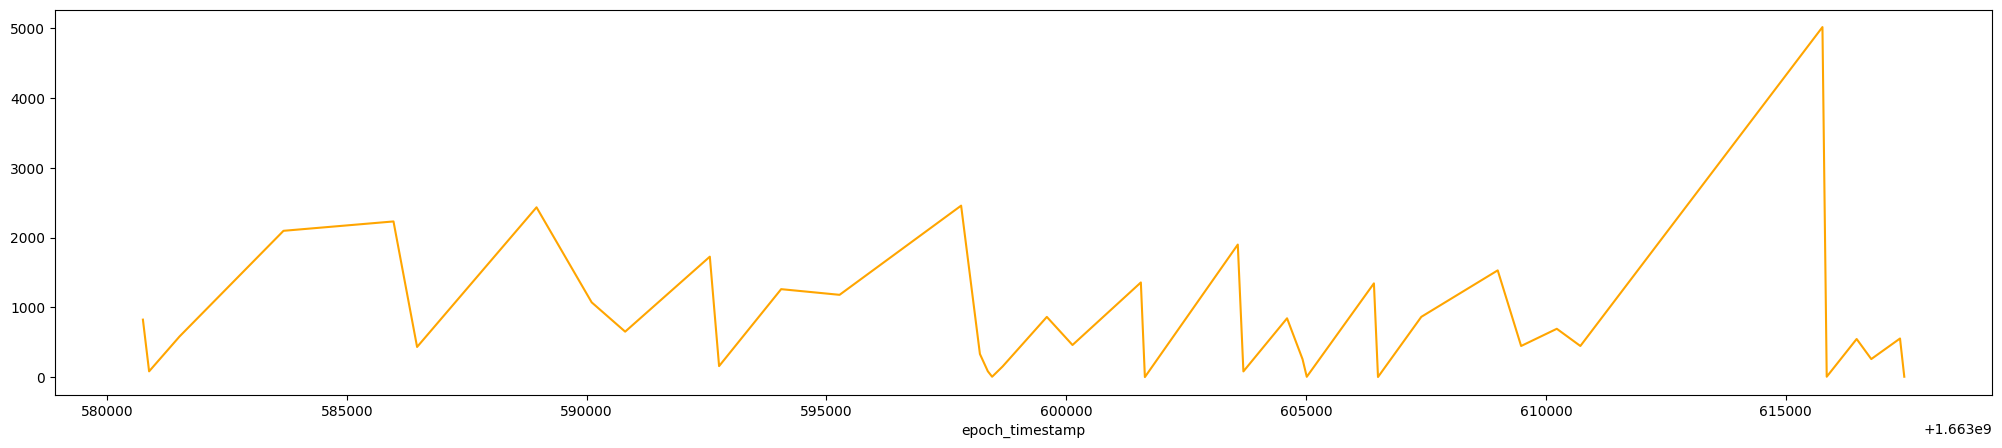

In [69]:
df.loc[(df['src_ip'] == '10.0.0.18') &(df['dest_ip'] == '162.125.4.14') & \
       (df['bytes'] == 845)].sort_values(by=['epoch_timestamp'], \
              ascending = True).set_index('epoch_timestamp')\
                     ['time_diff_sec'].plot(figsize=[25,5], \
                            kind = 'line', color = 'orange')

#### Listing 7.45 Jupyter notebook code — Plot the value of time_diff_sec for connections between 10.0.0.18 and 162.125.8.14 with 845 bytes

<Axes: xlabel='epoch_timestamp'>

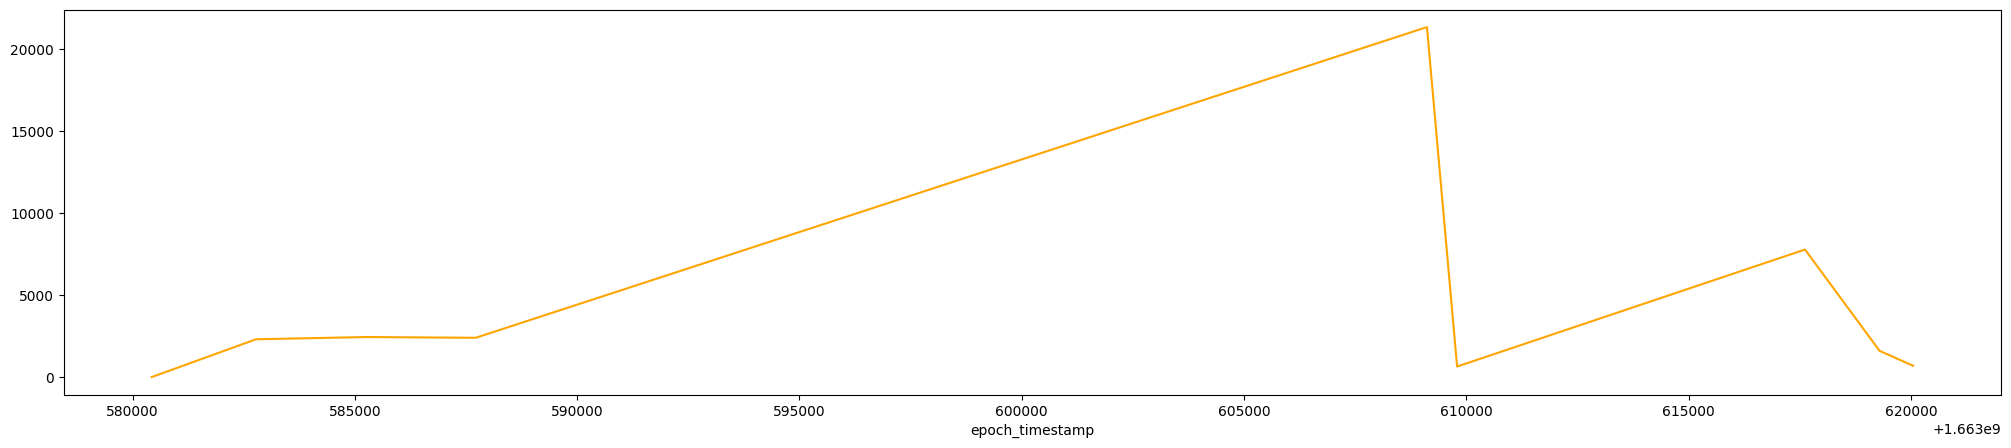

In [70]:
df.loc[(df['src_ip'] == '10.0.0.18') &(df['dest_ip'] == '162.125.8.14') & \
       (df['bytes'] == 845)].sort_values(by=['epoch_timestamp'], \
              ascending = True).set_index('epoch_timestamp')\
                     ['time_diff_sec'].plot(figsize=[25,5], \
                            kind = 'line', color = 'orange')